**Question 1 :** Run a PCA based on quantitative environmental variables (see previous exercise), using sites from the
Douro and Tejo basins. Produce a biplot with ‘Catchment_name’ as a grouping variable.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import  euclidean_distances

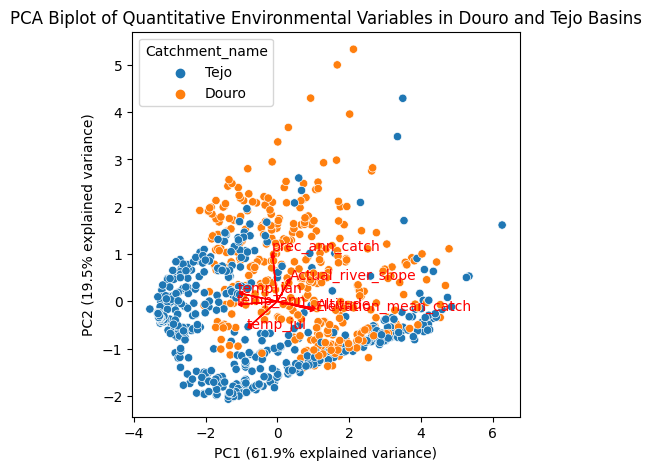

In [25]:
# Load the data and subset it
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

df = df[(df['Catchment_name'] == 'Tejo') | (df['Catchment_name'] == "Douro")]

# Select the variables of interest
columns = ['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
df = df[columns]

# Drop any rows with missing values and reset the index
df = df.dropna()
df = df.reset_index(drop = True)

# Separate the quantitative environmental variables
subset = df.drop("Catchment_name", axis=1)

# Standardize the data
data_std = StandardScaler().fit_transform(subset)

# Run the PCA
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(data_std)
pca_df = pd.DataFrame(data=pca_fit, columns=["PC1", "PC2"])

# Create a biplot with Catchment_name as a grouping variable
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(x="PC1", y="PC2", hue=df["Catchment_name"], data=pca_df, ax=ax)

variables = pca.components_.T * np.sqrt(pca.explained_variance_)
variable_labels = subset.columns

for i, v in enumerate(variables):
    ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, color="r")
    ax.text(v[0]*1.15, v[1]*1.15, variable_labels[i], color="r")

ax.set_xlabel("PC1 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[0]*100))
ax.set_ylabel("PC2 ({:.1f}% explained variance)".format(pca.explained_variance_ratio_[1]*100))
ax.set_title("PCA Biplot of Quantitative Environmental Variables in Douro and Tejo Basins")
plt.show()


**Question 2 :**  Using the same data, run a MDS and a NMDS and project the sites using the resulting first two axis. Use
also the ‘Catchment_name’ as a grouping variable.

C:\Users\alfor\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


Text(0.5, 1.0, 'MDS of Quantitative Environmental Variables in Douro and Tejo Basins')

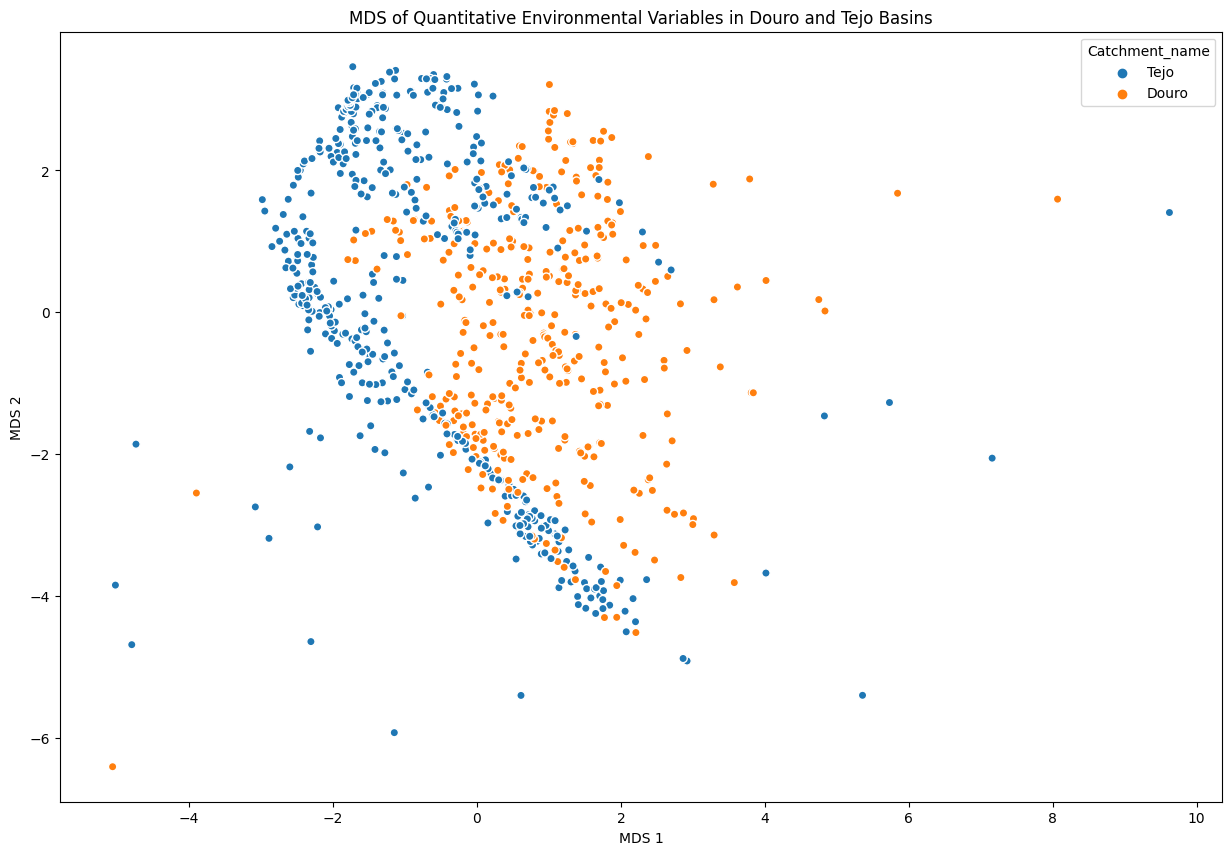

In [9]:
# Run the MDS
mds = MDS(n_components=2, random_state=0) 
mds_transf = mds.fit_transform(data_std)

# Plot the MDS results with grouping by Catchment_name
fig, ax = plt.subplots(figsize=(15, 10))

sns.scatterplot(x=mds_transf[:,0],
                y=mds_transf[:,1],
                hue=df["Catchment_name"],
                linewidth=1,
                ax=ax)

ax.set_xlabel("MDS 1")
ax.set_ylabel("MDS 2")
ax.set_title("MDS of Quantitative Environmental Variables in Douro and Tejo Basins")


C:\Users\alfor\AppData\Roaming\Python\Python310\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


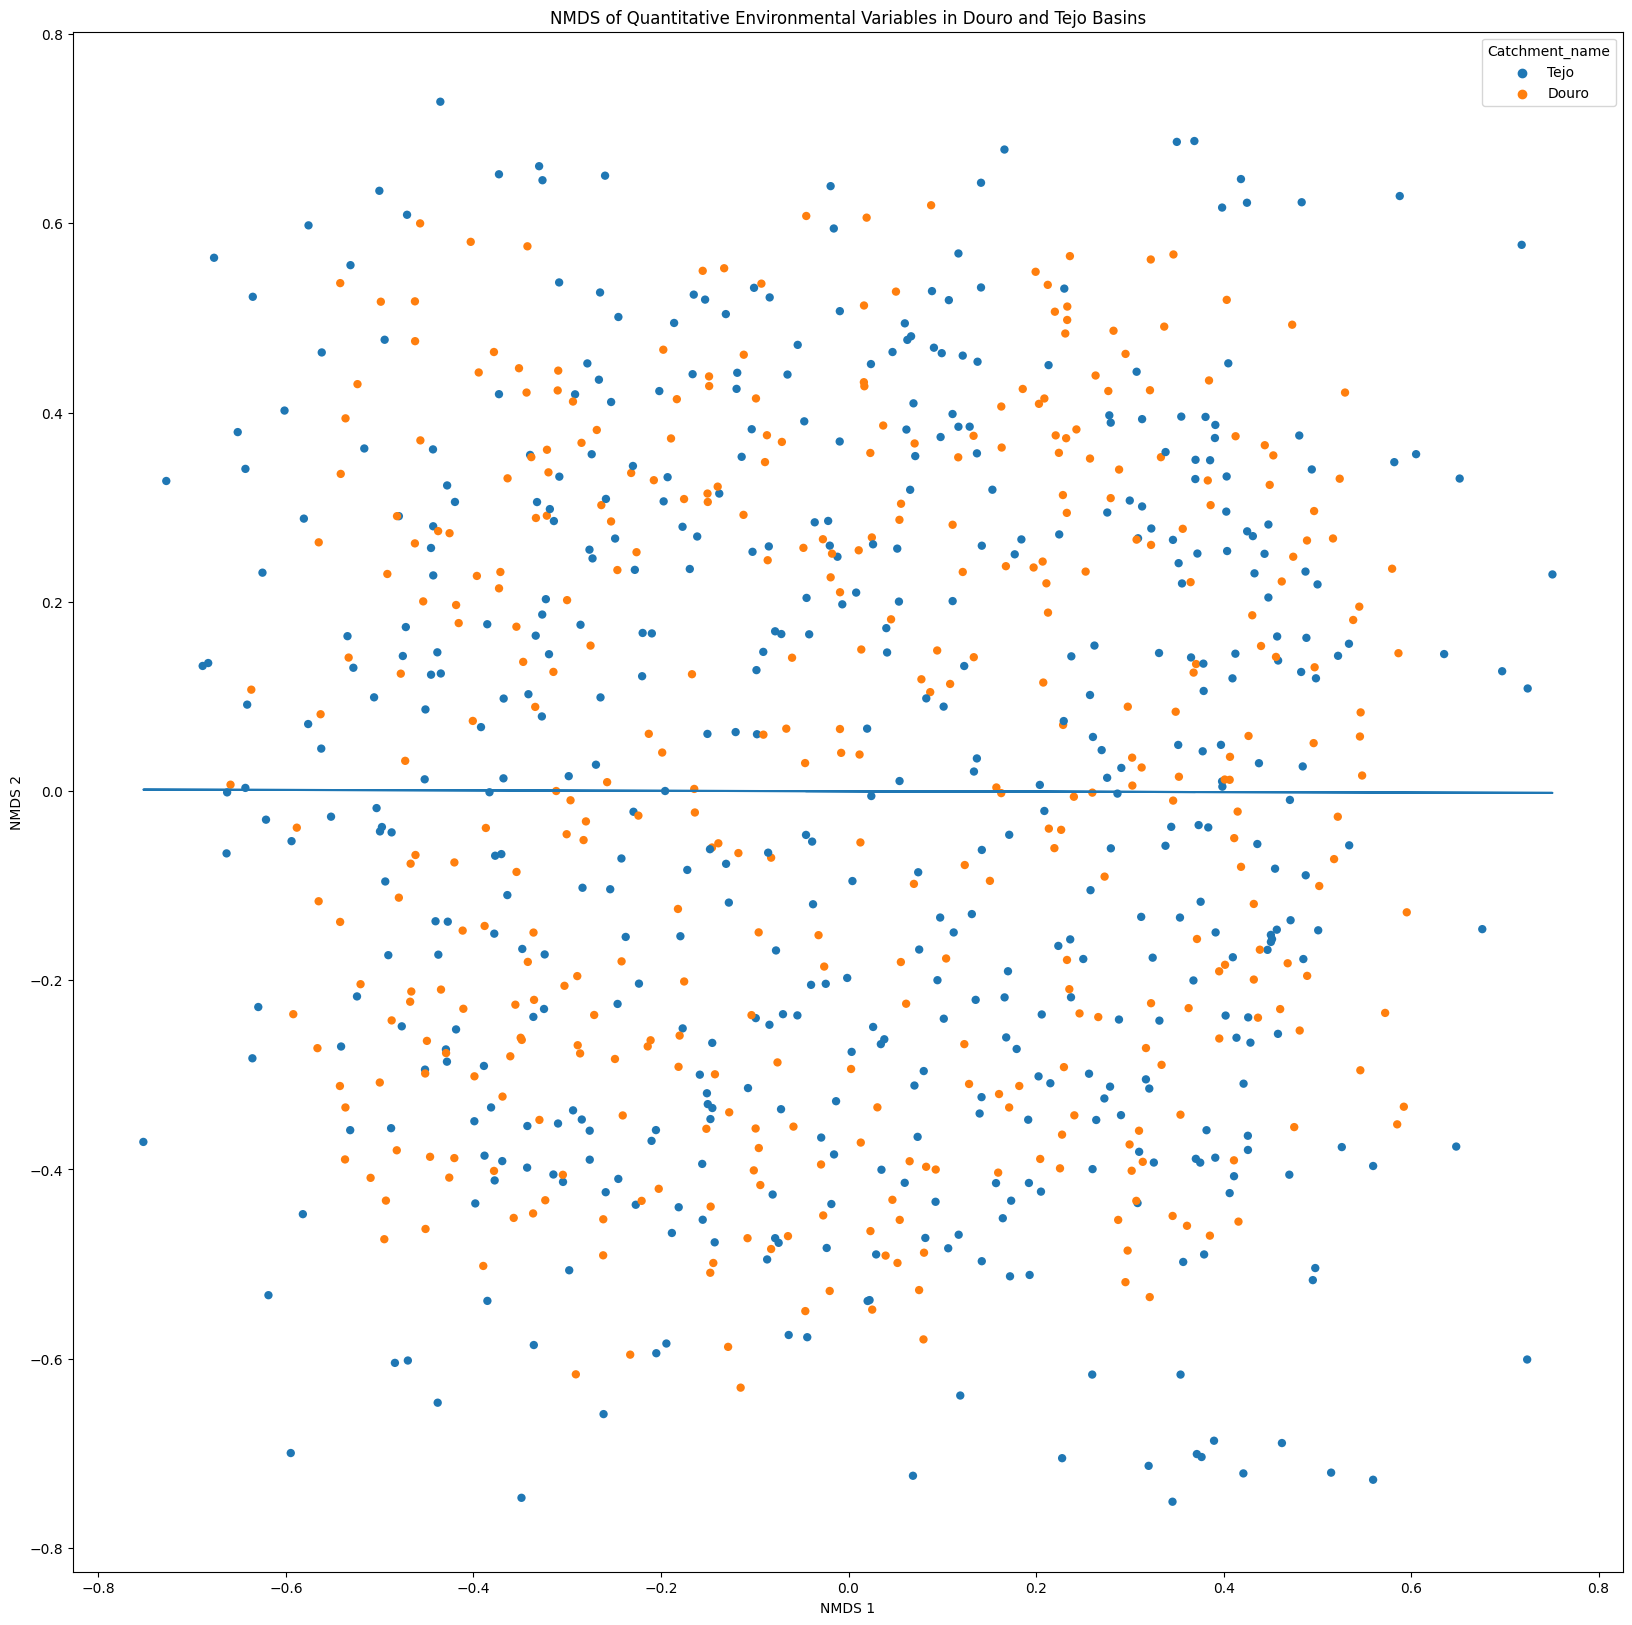

In [24]:
# Run the NMDS
nmds = MDS(n_components=2, random_state=0, metric=False, dissimilarity='precomputed', n_jobs=-1)
nmds_transf = nmds.fit_transform(euclidean_distances(data_std))

# Plot the NMDS results with grouping by Catchment_name
fig, ax = plt.subplots(figsize=(20, 20))

sns.scatterplot(x=nmds_transf[:,0],
                y=nmds_transf[:,1],
                hue=df["Catchment_name"],
                linewidth=0,
                ax=ax,
                )

sns.scatterplot()

x=nmds_transf[:,0]
y = nmds_transf[:,1]
z = np.polyfit(x=nmds_transf[:,0], y = nmds_transf[:,1],deg=1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x))

ax.set_xlabel("NMDS 1")
ax.set_ylabel("NMDS 2")
ax.set_title("NMDS of Quantitative Environmental Variables in Douro and Tejo Basins")

plt.show()